<a href="https://colab.research.google.com/github/Mung-Tamjung/PETECTIVE-ai/blob/main/dog_breeds_traning_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd "/content/drive/MyDrive"
!pip install -U -r yolov5/requirements.txt

/content/drive/MyDrive
  Using cached numpy-2.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.3 MB)


In [2]:
%cd "/content/drive/MyDrive/datasets"

/content/drive/MyDrive/datasets


In [3]:
!curl -L "https://app.roboflow.com/ds/y1wNrdILJt?key=Gp2CH14ZNH" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   910  100   910    0     0   4314      0 --:--:-- --:--:-- --:--:--  4333
100  102M  100  102M    0     0  34.5M      0  0:00:02  0:00:02 --:--:-- 40.1M
Archive:  roboflow.zip
replace README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
 extracting: test/images/Bichon167_jpg.rf.a43dca96019554c9649cb02dc71aeb7b.jpg  
 extracting: test/images/Bichon172_jpg.rf.e77fb44ef6539975a269c2bf6f0ecd42.jpg  
 extracting: test/images/Bichon175_jpg.rf.7495724fd4581b779b0c7eaa9c7acdbf.jpg  
 extracting: test/images/Bichon186_jpg.rf.a82ad621cadef3bd0c1548f7c6f11c9b.jpg  
 extracting: test/images/Bichon188_jpg.rf.122fbfd2b5e1f122116bf05448b8e33a.jpg  
 extracting: test/images/Bichon194_jpg.rf.a6fd7d0154859074ddb0480f5d5f68de

In [4]:
from glob import glob

# 이미지 경로 list로 넣기
train_img_list = glob('/content/drive/MyDrive/datasets/train/images/*.jpg') + glob('/content/drive/MyDrive/datasets/train/images/*.jpeg') + glob('/content/drive/MyDrive/datasets/train/images/*.png')
valid_img_list = glob('/content/drive/MyDrive/datasets/valid/images/*.jpg') + glob('/content/drive/MyDrive/datasets/valid/images/*.jpeg') + glob('./content/drive/MyDrive/datasets/valid/images/*.png')
test_img_list = glob('/content/drive/MyDrive/datasets/test/images/*.jpg') + glob('/content/drive/MyDrive/datasets/test/images/*.jpeg') + glob('./content/drive/MyDrive/datasets/test/images/*.png')


# txt 파일에 write
with open('/content/drive/MyDrive/datasets/train.txt', 'w') as f:
	f.write('\n'.join(train_img_list) + '\n')

with open('/content/drive/MyDrive/datasets/valid.txt', 'w') as f:
	f.write('\n'.join(valid_img_list) + '\n')

with open('/content/drive/MyDrive/datasets/test.txt', 'w') as f:
	f.write('\n'.join(test_img_list) + '\n')

In [5]:
import yaml

with open('/content/drive/MyDrive/datasets/data.yaml', 'r') as f:
	data = yaml.safe_load(f)

print(data)

data['train'] = '/content/drive/MyDrive/datasets/train.txt'
data['val'] = '/content/drive/MyDrive/datasets/valid.txt'
data['test'] = '/content/drive/MyDrive/datasets/test.txt'

with open('/content/drive/MyDrive/datasets/data.yaml', 'w') as f:
	yaml.dump(data, f)

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 5, 'names': ['Bichon', 'Chihuahua', 'Maltese', 'Pomeranian', 'Poodle'], 'roboflow': {'workspace': 'petective', 'project': 'dog-breeds-heriv', 'version': 7, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/petective/dog-breeds-heriv/dataset/7'}}


In [2]:
%cd /content/drive/MyDrive/yolov5

/content/drive/MyDrive/yolov5


In [7]:
!python train.py --img 640 --batch 16 --epochs 50 --data /content/drive/MyDrive/datasets/data.yaml \
--cfg ./models/yolov5s.yaml --weights yolov5s.pt --name dog_breeds_training_5

2024-07-09 03:45:38.926065: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 03:45:38.926114: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 03:45:39.041243: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/drive/MyDrive/datasets/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False

In [3]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_4/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_4/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/testimage/testimage.jpeg: 640x640 (no detections), 11.6ms
Speed: 0.7ms pre-process, 11.6ms inference, 16.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp50


In [4]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_5/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_5/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/testimage/testimage.jpeg: 640x640 1 Chihuahua, 11.5ms
Speed: 0.6ms pre-process, 11.5ms inference, 909.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/ex

**testimage.jpeg 검출 결과 =
model v4 검출 x /
model v5 Chihuahua 검출**

In [5]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_5/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage15.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_5/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage15.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/testimage/testimage15.jpg: 576x640 (no detections), 53.4ms
Speed: 0.7ms pre-process, 53.4ms inference, 14.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp52


**testimage15.jpg 검출 결과 = model v5 검출 x**

In [10]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_4/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage17.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_4/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage17.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/testimage/testimage17.jpg: 640x608 1 Pomeranian, 46.1ms
Speed: 0.6ms pre-process, 46.1ms inference, 701.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect

In [6]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_5/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage17.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_5/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage17.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/testimage/testimage17.jpg: 640x608 1 Pomeranian, 47.2ms
Speed: 0.7ms pre-process, 47.2ms inference, 684.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect

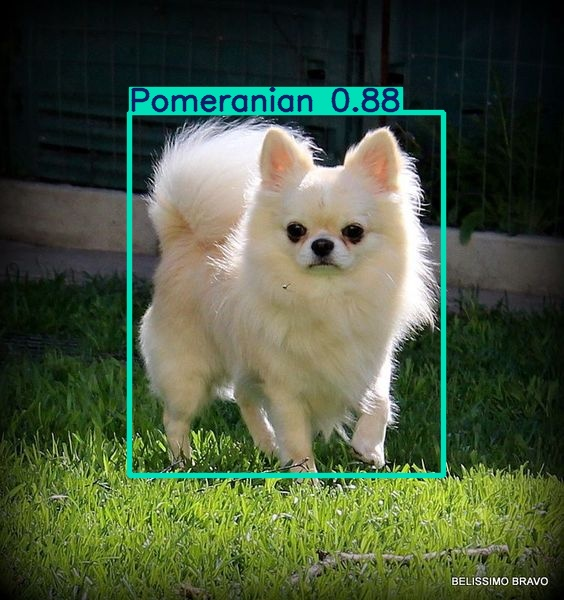

In [11]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp57/testimage17.jpg')
cv2_imshow(img)

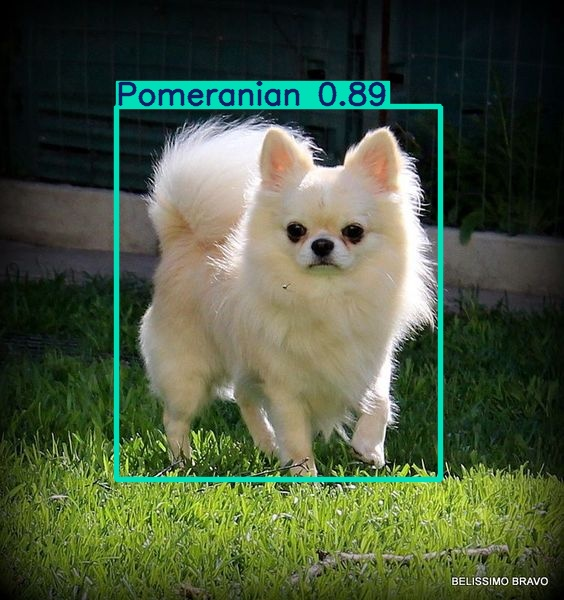

In [12]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp53/testimage17.jpg')
cv2_imshow(img)

**testimage17.jpg 검출 결과 =
model v4 Pomeranian 0.88/
model v5 Pomeranian 0.89**


In [9]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_4/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage14.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_4/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage14.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/testimage/testimage14.jpg: 640x384 1 Bichon, 48.0ms
Speed: 0.4ms pre-process, 48.0ms inference, 516.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp56


In [8]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_5/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage14.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_5/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage14.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/testimage/testimage14.jpg: 640x384 1 Bichon, 49.2ms
Speed: 0.6ms pre-process, 49.2ms inference, 566.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp

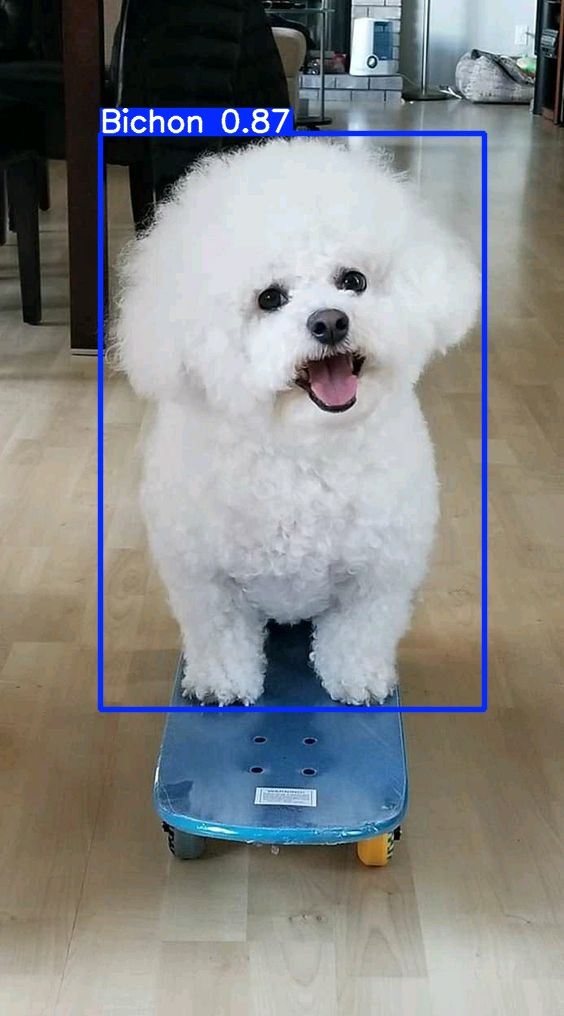

In [13]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp56/testimage14.jpg')
cv2_imshow(img)

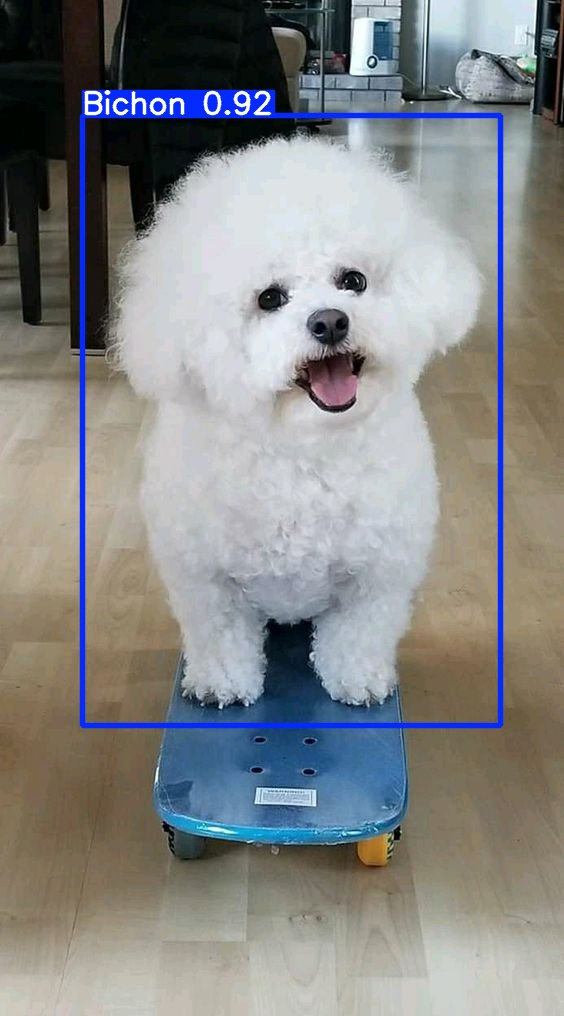

In [14]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp55/testimage14.jpg')
cv2_imshow(img)

**testimage14.jpg 검출 결과 =
model v4 Bichon 0.87/
model v5 Bichon 0.92**

model v5 = v4에 비해 전반적으로 정확도 상승. 여전히 검출 못하는 경우 있음 -> 개선 필요